# **Load library**

In [766]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns

# **Load datasets**

In [767]:
df = pd.read_excel('produksiPadi.xlsx', usecols=['Tahun', 'Produksi Padi(Ton)'])

# **Sneak peak data**

In [768]:
df.head()

,Tahun,Produksi Padi(Ton)
0,1970,18693649.0
1,1971,20483687.0
2,1972,19393933.0
3,1973,21490578.0
4,1974,22476073.0


In [769]:
print("\nData Statistics:\n")
df.describe()


Data Statistics:



,Tahun,Produksi Padi(Ton)
count,53.000000,5.300000e+01
mean,1996.000000,4.694139e+07
std,15.443445,1.632983e+07
min,1970.000000,1.869365e+07
25%,1983.000000,3.530311e+07
50%,1996.000000,4.937705e+07
75%,2009.000000,5.460403e+07
max,2022.000000,8.114862e+07


In [770]:
print("\nDataFrame Information:\n")
df.info()


DataFrame Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tahun               53 non-null     int64  
 1   Produksi Padi(Ton)  53 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 976.0 bytes


In [771]:
print(f"\nNumber of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")


Number of rows: 53, Number of columns: 2


# **Handling Missing Values**

In [772]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Tahun                 0
Produksi Padi(Ton)    0
dtype: int64


In [773]:
df = df.fillna(df.mean())

# **Exploratory Data Analysis (EDA)**

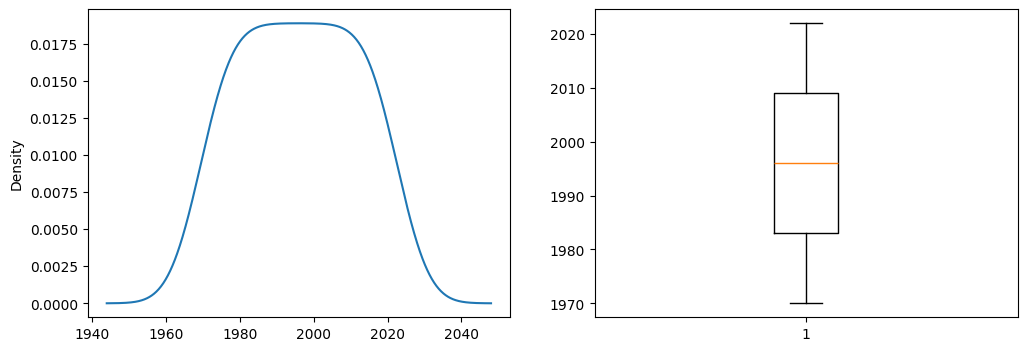

In [774]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['Tahun'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['Tahun'])
plt.show()

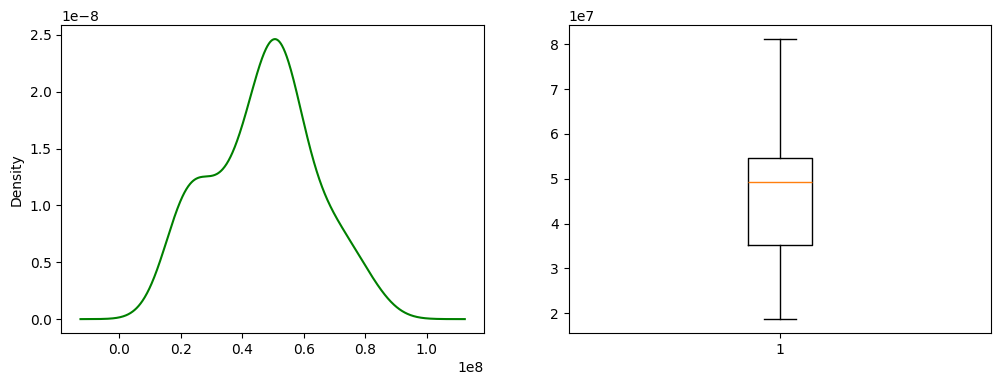

In [775]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['Produksi Padi(Ton)'].plot(kind='kde', color='green')

f.add_subplot(1,2,2)
plt.boxplot(df['Produksi Padi(Ton)'])
plt.show()

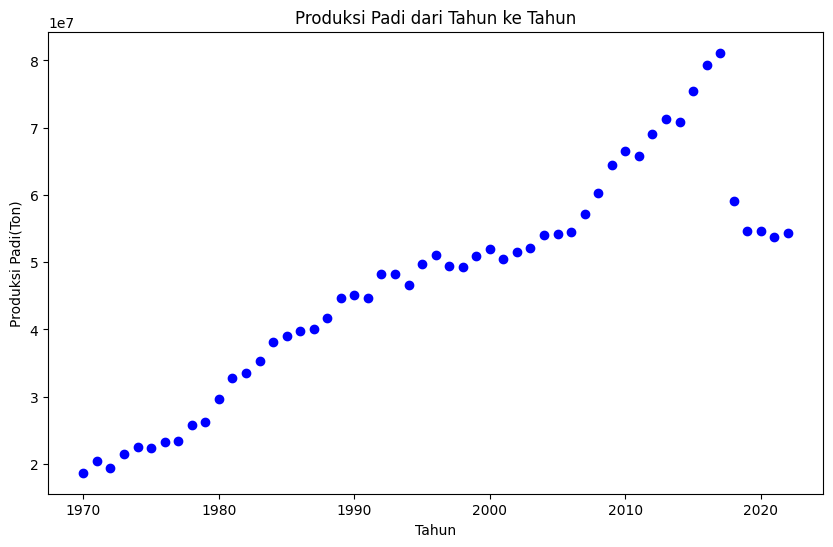

In [776]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Tahun'], df['Produksi Padi(Ton)'], color='blue')
plt.title('Produksi Padi dari Tahun ke Tahun')
plt.xlabel('Tahun')
plt.ylabel('Produksi Padi(Ton)')
plt.show()

**Ubah Data Secara Lagging**

In [777]:
df.head()

,Tahun,Produksi Padi(Ton)
0,1970,18693649.0
1,1971,20483687.0
2,1972,19393933.0
3,1973,21490578.0
4,1974,22476073.0


In [778]:
df['Produksi Padi(Ton) Lagging'] = df['Produksi Padi(Ton)'].shift(1)
df = df.dropna()

In [779]:
df.head()

,Tahun,Produksi Padi(Ton),Produksi Padi(Ton) Lagging
1,1971,20483687.0,18693649.0
2,1972,19393933.0,20483687.0
3,1973,21490578.0,19393933.0
4,1974,22476073.0,21490578.0
5,1975,22339455.0,22476073.0


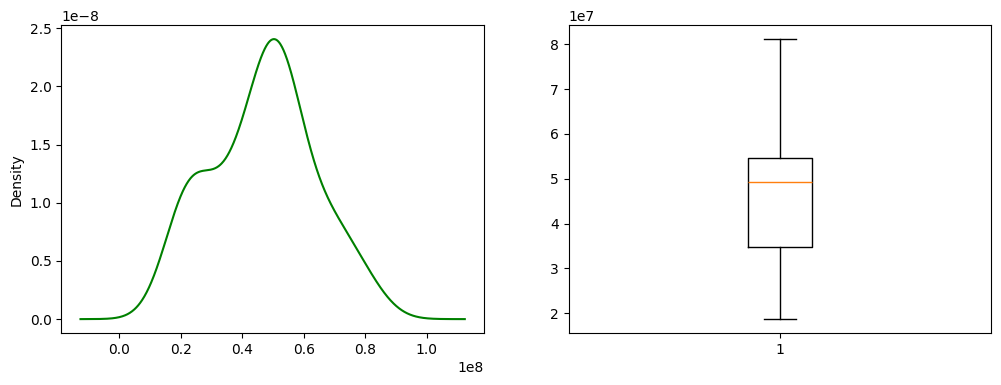

In [780]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['Produksi Padi(Ton) Lagging'].plot(kind='kde', color='green')

f.add_subplot(1,2,2)
plt.boxplot(df['Produksi Padi(Ton) Lagging'])
plt.show()

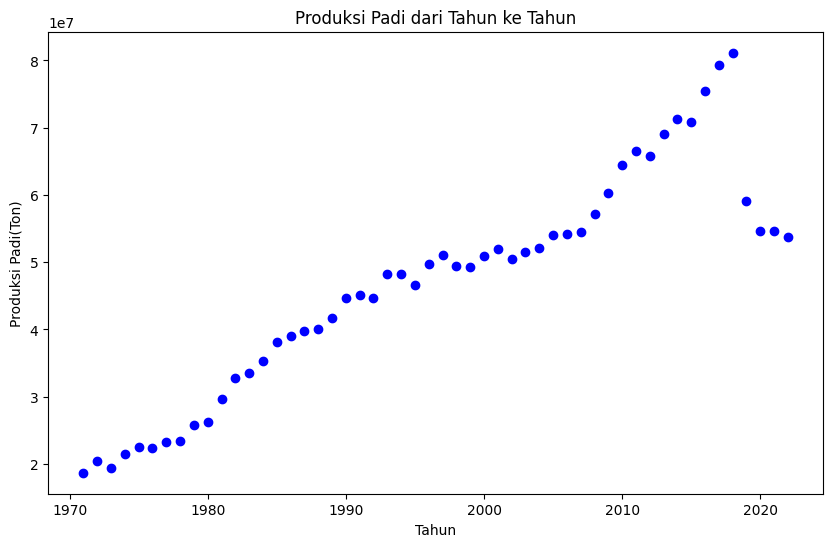

In [781]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Tahun'], df['Produksi Padi(Ton) Lagging'], color='blue')
plt.title('Produksi Padi dari Tahun ke Tahun')
plt.xlabel('Tahun')
plt.ylabel('Produksi Padi(Ton)')
plt.show()

In [782]:
df.corr()

,Tahun,Produksi Padi(Ton),Produksi Padi(Ton) Lagging
Tahun,1.000000,0.913457,0.931496
Produksi Padi(Ton),0.913457,1.000000,0.975033
Produksi Padi(Ton) Lagging,0.931496,0.975033,1.000000


# **Modelling**

**Recall Data**

In [783]:
df.head()

,Tahun,Produksi Padi(Ton),Produksi Padi(Ton) Lagging
1,1971,20483687.0,18693649.0
2,1972,19393933.0,20483687.0
3,1973,21490578.0,19393933.0
4,1974,22476073.0,21490578.0
5,1975,22339455.0,22476073.0


**Split Data (70:30)**

In [784]:
x = df[['Tahun', 'Produksi Padi(Ton) Lagging']]
y = df['Produksi Padi(Ton)']

In [785]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

**Model Linier Regresi**

In [786]:
model = LinearRegression()

In [787]:
model.fit(x_train, y_train)

LinearRegression()

In [788]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-8.44504442e+04  1.08030141e+00]
Intercept: 166173302.96848315


In [789]:
score = model.score(x_test, y_test)
print(f"R-squared Score: {score:.2f}")

R-squared Score: 0.85


In [790]:
y_prediksi = model.predict(x_test)

In [791]:
mse = mean_squared_error(y_test, y_prediksi)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_prediksi)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape * 100:.2f}%")

MSE: 38722346686301.49
RMSE: 6222728.234970694
MAPE: 4.98%


Text(0.5, 1.0, 'Produksi Padi dari Tahun ke Tahun')

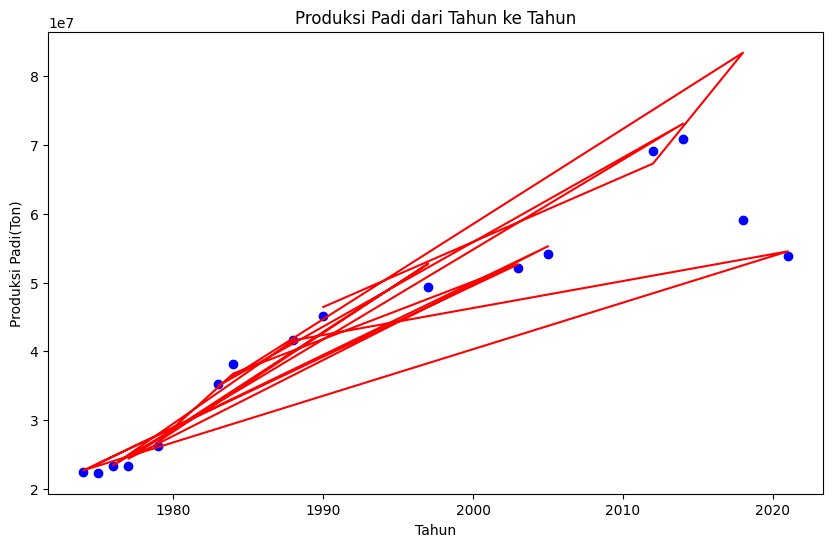

In [792]:
plt.figure(figsize=(10, 6))

plt.scatter(x_test['Tahun'], y_test, color="blue")
plt.plot(x_test['Tahun'], y_prediksi, color="red")

plt.xlabel('Tahun')
plt.ylabel('Produksi Padi(Ton)')
plt.title('Produksi Padi dari Tahun ke Tahun')

**Visualisasi Lain**

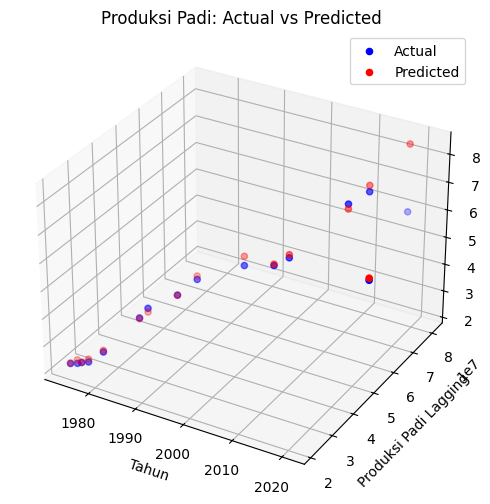

In [793]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot data
ax.scatter(x_test['Tahun'], x_test['Produksi Padi(Ton) Lagging'], y_test, color='blue', label='Actual')
ax.scatter(x_test['Tahun'], x_test['Produksi Padi(Ton) Lagging'], y_prediksi, color='red', label='Predicted')

# Labels
ax.set_xlabel('Tahun')
ax.set_ylabel('Produksi Padi Lagging')
ax.set_zlabel('Produksi Padi')
ax.set_title('Produksi Padi: Actual vs Predicted')
plt.legend()
plt.show()

# **Prediction**

In [794]:
tahun_2023 = pd.DataFrame({'Tahun': [2023], 'Produksi Padi(Ton) Lagging': [df['Produksi Padi(Ton)'].iloc[-1]]})
prediksi_2023 = model.predict(tahun_2023)
print(f"Prediksi Produksi Padi Tahun 2023: {prediksi_2023[0]:,.2f} Ton")

Prediksi Produksi Padi Tahun 2023: 54,031,915.95 Ton


In [795]:
tahun_2024 = pd.DataFrame({'Tahun': [2024], 'Produksi Padi(Ton) Lagging': [prediksi_2023[0]]})
prediksi_2024 = model.predict(tahun_2024)
print(f"Prediksi Produksi Padi Tahun 2024: {prediksi_2024[0]:,.2f} Ton")

Prediksi Produksi Padi Tahun 2024: 53,616,359.07 Ton


# **Eksperimen Lain**

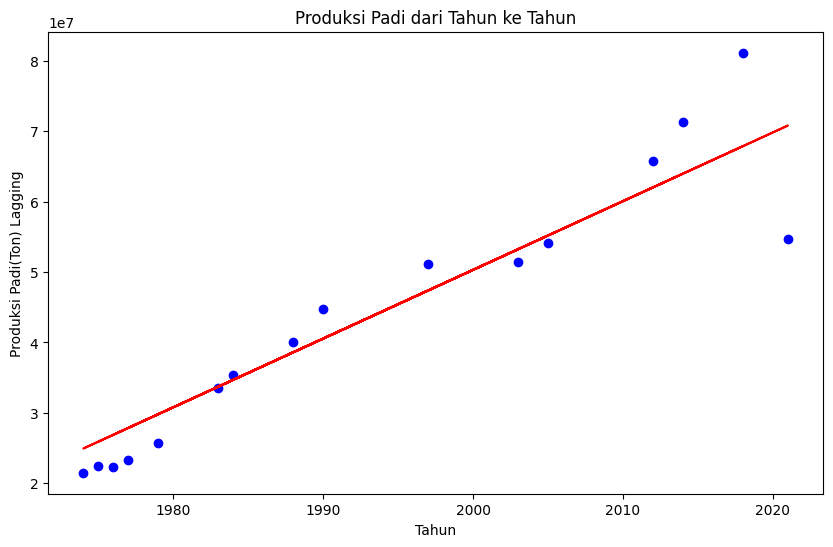

In [796]:
x = df[['Tahun']]
y = df['Produksi Padi(Ton) Lagging']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_prediksi = model.predict(x_test)

plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color="blue")
plt.plot(x_test, y_prediksi, color="red")
plt.xlabel('Tahun')
plt.ylabel('Produksi Padi(Ton) Lagging')
plt.title('Produksi Padi dari Tahun ke Tahun')
plt.show()

In [797]:
tahun_2023 = pd.DataFrame({'Tahun': [2023]})
prediksi_2023 = model.predict(tahun_2023)
print(f"Prediksi Produksi Padi Tahun 2023: {prediksi_2023[0]:,.2f} Ton")

Prediksi Produksi Padi Tahun 2023: 72,758,283.37 Ton


In [798]:
tahun_2024 = pd.DataFrame({'Tahun': [2024]})
prediksi_2024 = model.predict(tahun_2024)
print(f"Prediksi Produksi Padi Tahun 2024: {prediksi_2024[0]:,.2f} Ton")

Prediksi Produksi Padi Tahun 2024: 73,734,361.16 Ton
